In [ ]:
# 필요한 라이브러리 설치
!pip install pandas scikit-learn lifelines matplotlib seaborn scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 3.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=f4c459831fd7fbc4ed4d98186bcbc2b7dd51545e278380dec5f4cdfa783ab9b9
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [ ]:
# 데이터와 분석에 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from sksurv.ensemble import RandomSurvivalForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
!pip install lifelines

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib ## 코랩 한글 깨짐 이슈 해결

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.7 MB/s eta 0:00:00


In [ ]:
## 최종 카페 데이터셋
data = '/content/drive/MyDrive/baf_society/modeling_data_1105.csv'
modeling_data = pd.read_csv(data, encoding='UTF-8')

In [ ]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47749 entries, 0 to 47748
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   업소명                    47749 non-null  object 
 1   행정동명                   47749 non-null  object 
 2   소재지도로명                 47749 non-null  object 
 3   영업자시작일                 47749 non-null  object 
 4   폐업일자                   19505 non-null  object 
 5   총면적                    47749 non-null  float64
 6   복층여부                   47749 non-null  int64  
 7   폐업여부                   47749 non-null  int64  
 8   카페유형                   47749 non-null  object 
 9   월                      47749 non-null  int64  
 10  계절                     47749 non-null  object 
 11  고가프차 개수_500m           47749 non-null  int64  
 12  저가프차 개수_500m           47749 non-null  int64  
 13  중가프차 개수_500m           47749 non-null  int64  
 14  스타벅스 개수_500m           47749 non-null  int64  
 15  카페

#### 변수 설명
- 업소명: 카페 이름
- 행정동명: 위치한 행정동
- 소재지도로명: 주소
- 영업자시작일: 영업 시작일
- 폐업일자: 폐업일 (있을 경우)
- 총면적: 면적
- 복층여부: 복층 유무 (0: 없음, 1: 있음)
- 폐업여부: 폐업 여부 (0: 운영 중, 1: 폐업)
- 카페유형: 카페 유형 (예: 개인 카페, 고가 프랜차이즈 등)
- 월, 계절: 데이터가 수집된 시간적 배경
- 총 영업일: 총 운영한 일수
- 임대료 평균 점수: 행정동 별 월 임대료 평균 점수   
- 반경 내 주변 상권 변수 개수
- 행정동 별 생활 인구 점수

In [ ]:
data = modeling_data.copy()

In [ ]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47749 entries, 0 to 47748
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   업소명                    47749 non-null  object 
 1   행정동명                   47749 non-null  object 
 2   소재지도로명                 47749 non-null  object 
 3   영업자시작일                 47749 non-null  object 
 4   폐업일자                   19505 non-null  object 
 5   총면적                    47749 non-null  float64
 6   복층여부                   47749 non-null  int64  
 7   폐업여부                   47749 non-null  int64  
 8   카페유형                   47749 non-null  object 
 9   월                      47749 non-null  int64  
 10  계절                     47749 non-null  object 
 11  고가프차 개수_500m           47749 non-null  int64  
 12  저가프차 개수_500m           47749 non-null  int64  
 13  중가프차 개수_500m           47749 non-null  int64  
 14  스타벅스 개수_500m           47749 non-null  int64  
 15  카페

In [ ]:
data['생활인구 점수'] = data[['1분기 평균', '2분기 평균', '3분기 평균', '4분기 평균']].mean(axis=1)

In [ ]:
data.drop(['1분기 평균', '2분기 평균', '3분기 평균', '4분기 평균','월'], axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47749 entries, 0 to 47748
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   업소명                    47749 non-null  object 
 1   행정동명                   47749 non-null  object 
 2   소재지도로명                 47749 non-null  object 
 3   영업자시작일                 47749 non-null  object 
 4   폐업일자                   19505 non-null  object 
 5   총면적                    47749 non-null  float64
 6   복층여부                   47749 non-null  int64  
 7   폐업여부                   47749 non-null  int64  
 8   카페유형                   47749 non-null  object 
 9   계절                     47749 non-null  object 
 10  고가프차 개수_500m           47749 non-null  int64  
 11  저가프차 개수_500m           47749 non-null  int64  
 12  중가프차 개수_500m           47749 non-null  int64  
 13  스타벅스 개수_500m           47749 non-null  int64  
 14  카페 개수_500m             47749 non-null  int64  
 15  음식

In [ ]:
# path = '/content/drive/MyDrive/baf_society/modeling_data_1105_rkdms.csv'
# data.to_csv(path, index=False)

## COX 모델 활용

In [ ]:
new_data = data.copy()

In [ ]:
from lifelines import CoxPHFitter
from lifelines.utils import datetimes_to_durations

# 날짜 형식을 datetime으로 변환
new_data['영업자시작일'] = pd.to_datetime(new_data['영업자시작일'])
new_data['폐업일자'] = pd.to_datetime(new_data['폐업일자'])

# 생존 시간과 이벤트 발생(폐업) 여부 계산
T, E = datetimes_to_durations(new_data['영업자시작일'], new_data['폐업일자'], fill_date=pd.Timestamp('2023-09-28'))

# 계산된 생존 시간과 이벤트 발생 여부를 데이터프레임에 추가
new_data['생존시간'] = T
new_data['이벤트'] = E.astype(int)

# 관련 변수만 선택
model_data = new_data[['생존시간', '이벤트', '총면적', '복층여부', '카페유형', '계절', '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m', '스타벅스 개수_500m', '카페 개수_500m', '음식점 개수_500m', '생활인구 점수']]

# 카페유형과 계절은 범주형이므로 더미 변수로 변환
model_data = pd.get_dummies(model_data, drop_first=True)

# Cox 비례 위험 모델 적합
cph = CoxPHFitter()
cph.fit(model_data, '생존시간', event_col='이벤트')

# 모델 요약 출력
cph.print_summary()


/usr/local/lib/python3.10/dist-packages/lifelines/utils/__init__.py:693: UserWarning: Warning: some values of start_times are after end_times.

  warnings.warn("Warning: some values of start_times are after end_times.\n", UserWarning)


<lifelines.CoxPHFitter: fitted with 47749 total observations, 29646 right-censored observations>
             duration col = '생존시간'
                event col = '이벤트'
      baseline estimation = breslow
   number of observations = 47749
number of events observed = 18103
   partial log-likelihood = -182934.25
         time fit was run = 2024-11-05 12:03:33 UTC

---
               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                      
총면적           -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
복층여부          -0.20      0.82      0.06           -0.31           -0.08                0.73                0.92
고가프차 개수_500m   0.06      1.07      0.01            0.05            0.08                1.05                1.08
저가프차 개수_500m  -0.11      0.89      0.01           -0.13           -0.09                0.88                0.91
중가프차 개수_500m  -0.13      0.88      0.01           -0.14           -0.12                0.87                0.89
스타벅스 개수_500m  -0.05      0.95      0.01           -0.07           -0.03                0.93                0.97
카페 개수_500m    -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
음식점 개수_500m    0.00      1.00      0.00            0.00            0.00                1.00                1.00
생활인구 점수       -0.03      0.97      0.00           -0.04           -0.02                0.96                0.98
카페유형_고가 프랜차이즈 -0.81      0.44      0.06           -0.94           -0.69                0.39                0.50
카페유형_저가 프랜차이즈 -1.91      0.15      0.14           -2.19           -1.63                0.11                0.20
카페유형_중가 프랜차이즈 -1.07      0.34      0.07           -1.20           -0.94                0.30                0.39
계절_겨울         -0.05      0.96      0.02           -0.09           -0.00                0.91                1.00
계절_봄          -0.01      0.99      0.02           -0.05            0.03                0.95                1.03
계절_여름          0.02      1.02      0.02           -0.02            0.06                0.98                1.07

               cmp to      z      p  -log2(p)
covariate                                    
총면적              0.00  -8.48 <0.005     55.30
복층여부             0.00  -3.44 <0.005     10.76
고가프차 개수_500m     0.00  11.62 <0.005    101.31
저가프차 개수_500m     0.00 -10.98 <0.005     90.71
중가프차 개수_500m     0.00 -18.89 <0.005    262.03
스타벅스 개수_500m     0.00  -5.28 <0.005     22.86
카페 개수_500m       0.00 -13.85 <0.005    142.56
음식점 개수_500m      0.00  27.15 <0.005    536.63
생활인구 점수          0.00  -5.60 <0.005     25.44
카페유형_고가 프랜차이즈    0.00 -12.62 <0.005    118.79
카페유형_저가 프랜차이즈    0.00 -13.32 <0.005    131.97
카페유형_중가 프랜차이즈    0.00 -15.94 <0.005    187.56
계절_겨울            0.00  -2.04   0.04      4.60
계절_봄             0.00  -0.55   0.58      0.78
계절_여름            0.00   1.03   0.30      1.73
---
Concordance = 0.62
Partial AIC = 365898.49
log-likelihood ratio test = 3136.78 on 15 df
-log2(p) of ll-ratio test = inf

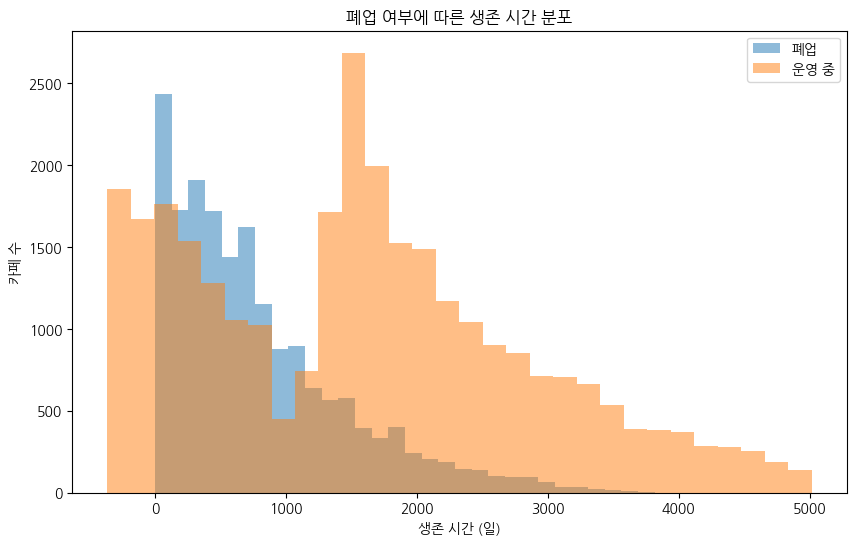

In [ ]:
# 다시 시각화를 위한 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(new_data[new_data['이벤트'] == 1]['생존시간'], bins=30, alpha=0.5, label='폐업')
plt.hist(new_data[new_data['이벤트'] == 0]['생존시간'], bins=30, alpha=0.5, label='운영 중')
plt.xlabel('생존 시간 (일)')
plt.ylabel('카페 수')
plt.title('폐업 여부에 따른 생존 시간 분포')
plt.legend()
plt.show()

#### 더미변수화 후 다시 진행


In [ ]:
df2 = data.copy()

In [ ]:
df2 = df2[[ '총면적', '복층여부',  '폐업여부', '총 영업일','카페유형',  '계절', '고가프차 개수_500m', '저가프차 개수_500m', '중가프차 개수_500m',
       '스타벅스 개수_500m', '카페 개수_500m', '음식점 개수_500m', 'bank_500m 개수',
       'elementary_500m 개수', 'middle_500m 개수', 'high_800m 개수', 'univ_1000m 개수',
       'hospital_re_500m 개수', 'bus_250m 개수', 'subway_250m 존재여부',
       'hospital_big_1000m 개수', '생활인구 점수','월 임대료 평균 점수']]
# 더미 변수로 변환
data_with_dummies = pd.get_dummies(df2, columns=['복층여부','카페유형','계절'], drop_first=True)

In [ ]:
# 데이터 전처리 및 더미 변수 생성
# 범주형 컬럼 확인
categorical_columns = ['복층여부', '카페유형', '계절']  # 여기에 다른 범주형 컬럼이 있다면 추가하세요.

# 더미 변수로 변환
df2 = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47749 entries, 0 to 47748
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   총면적                    47749 non-null  float64
 1   폐업여부                   47749 non-null  int64  
 2   총 영업일                  47749 non-null  int64  
 3   고가프차 개수_500m           47749 non-null  int64  
 4   저가프차 개수_500m           47749 non-null  int64  
 5   중가프차 개수_500m           47749 non-null  int64  
 6   스타벅스 개수_500m           47749 non-null  int64  
 7   카페 개수_500m             47749 non-null  int64  
 8   음식점 개수_500m            47749 non-null  int64  
 9   bank_500m 개수           47749 non-null  int64  
 10  elementary_500m 개수     47749 non-null  int64  
 11  middle_500m 개수         47749 non-null  int64  
 12  high_800m 개수           47749 non-null  int64  
 13  univ_1000m 개수          47749 non-null  int64  
 14  hospital_re_500m 개수    47749 non-null  int64  
 15  bu

In [ ]:
# 모델 적합
cph = CoxPHFitter()
cph.fit(df2, duration_col='총 영업일', event_col='폐업여부')  # '총 영업일'과 '폐업여부'를 사용

# 결과 출력
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 47749 total observations, 28244 right-censored observations>
             duration col = '총 영업일'
                event col = '폐업여부'
      baseline estimation = breslow
   number of observations = 47749
number of events observed = 19505
   partial log-likelihood = -199311.77
         time fit was run = 2024-11-05 12:14:59 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
총면적                   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
고가프차 개수_500m           0.04      1.04      0.01            0.03            0.05                1.03                1.05
저가프차 개수_500m          -0.02      0.98      0.01           -0.04           -0.01                0.96                0.99
중가프차 개수_500m          -0.13      0.87      0.01           -0.15           -0.12                0.86                0.89
스타벅스 개수_500m          -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
카페 개수_500m            -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
음식점 개수_500m            0.00      1.00      0.00            0.00            0.00                1.00                1.00
bank_500m 개수           0.01      1.01      0.00            0.00            0.01                1.00                1.01
elementary_500m 개수    -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
middle_500m 개수        -0.03      0.97      0.01           -0.05           -0.01                0.95                0.99
high_800m 개수           0.04      1.04      0.01            0.03            0.06                1.03                1.06
univ_1000m 개수         -0.03      0.97      0.01           -0.05           -0.00                0.95                1.00
hospital_re_500m 개수    0.03      1.03      0.00            0.02            0.04                1.02                1.04
bus_250m 개수           -0.00      1.00      0.00           -0.01            0.00                0.99                1.00
subway_250m 존재여부      -0.05      0.95      0.02           -0.08           -0.01                0.92                0.99
hospital_big_1000m 개수 -0.07      0.93      0.01           -0.09           -0.05                0.91                0.95
생활인구 점수               -0.03      0.97      0.01           -0.04           -0.02                0.96                0.98
월 임대료 평균 점수            0.03      1.03      0.01            0.02            0.05                1.02                1.05
복층여부_1                -0.19      0.83      0.06           -0.30           -0.08                0.74                0.93
카페유형_고가 프랜차이즈         -0.90      0.41      0.06           -1.02           -0.77                0.36                0.46
카페유형_저가 프랜차이즈         -2.06      0.13      0.13           -2.31           -1.81                0.10                0.16
카페유형_중가 프랜차이즈         -1.08      0.34      0.07           -1.20           -0.95                0.30                0.39
계절_겨울                 -0.05      0.95      0.02           -0.09           -0.01                0.91                0.99
계절_봄                  -0.00      1.00      0.02           -0.04            0.04                0.96                1.04
계절_여름                  0.02      1.02      0.02           -0.02            0.06                0.98                1.06

                       cmp to      z      p  -log2(p)
covariate                                            
총면적                      0.00  -9.93 <0.005     74.72
고가프차 개수_500m             0.00   6.56 <0.005     34.12
저가프차 개수_500m             0.00  -2.79   0.01      7.55
중가프차 개수_500m             0.00 -20.52 <0.005    308.55
스타벅스 개수_500m             0.00  -1.11   0.27      1.90
카페 개수_500m   

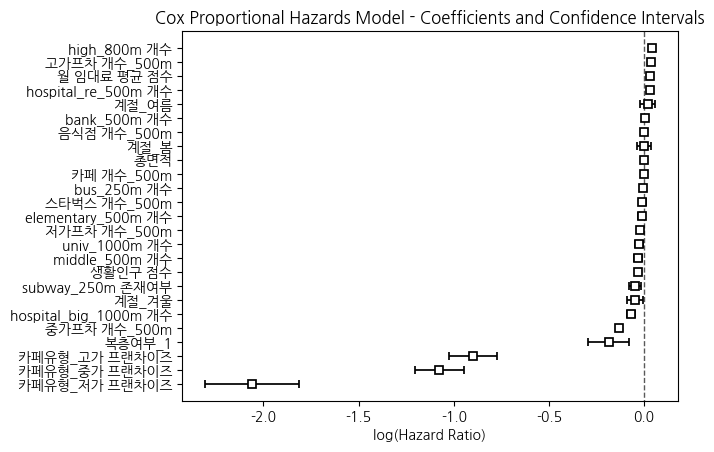

In [ ]:
# 모델의 계수를 시각화
cph.plot()
plt.title('Cox Proportional Hazards Model - Coefficients and Confidence Intervals')
plt.xlabel('log(Hazard Ratio)')
plt.show()

## KaplanMeier

In [ ]:
pip install lifelines


In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test  # 수정된 부분

# 데이터 불러오기
df3 = data.copy()

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47749 entries, 0 to 47748
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   업소명                    47749 non-null  object 
 1   행정동명                   47749 non-null  object 
 2   소재지도로명                 47749 non-null  object 
 3   영업자시작일                 47749 non-null  object 
 4   폐업일자                   19505 non-null  object 
 5   총면적                    47749 non-null  float64
 6   복층여부                   47749 non-null  int64  
 7   폐업여부                   47749 non-null  int64  
 8   카페유형                   47749 non-null  object 
 9   계절                     47749 non-null  object 
 10  고가프차 개수_500m           47749 non-null  int64  
 11  저가프차 개수_500m           47749 non-null  int64  
 12  중가프차 개수_500m           47749 non-null  int64  
 13  스타벅스 개수_500m           47749 non-null  int64  
 14  카페 개수_500m             47749 non-null  int64  
 15  음식

In [ ]:
data['카페유형'].unique()

array(['개인 카페', '고가 프랜차이즈', '중가 프랜차이즈', '저가 프랜차이즈'], dtype=object)

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 개인 카페와 개인 카페가 아닌 데이터셋 분리
df_personal = df3[df3['카페유형'] == '개인 카페'].copy()
df_franchise = df3[df3['카페유형'] != '개인 카페'].copy()

# NaN 값 및 숫자형 변환 처리
df_personal['총 영업일'] = pd.to_numeric(df_personal['총 영업일'], errors='coerce').dropna()
df_personal['폐업여부'] = pd.to_numeric(df_personal['폐업여부'], errors='coerce').dropna()

df_franchise['총 영업일'] = pd.to_numeric(df_franchise['총 영업일'], errors='coerce').dropna()
df_franchise['폐업여부'] = pd.to_numeric(df_franchise['폐업여부'], errors='coerce').dropna()


In [ ]:
df_personal

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,복층여부,폐업여부,카페유형,계절,...,elementary_500m 개수,middle_500m 개수,high_800m 개수,univ_1000m 개수,hospital_re_500m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,월 임대료 평균 점수,생활인구 점수
0,커피앤모바일,장위제1동,서울특별시 성북구 장월로 174 (장위동),2010-01-04,2010-04-02,17.36,0,1,개인 카페,겨울,...,2,2,1,2,0,20,0,0,-1.448152,-0.216536
1,커피사업지원센타,원효로제2동,"서울특별시 용산구 효창원로12길 37, (원효로4가,(지상1층))",2010-01-04,NaN,89.10,0,0,개인 카페,겨울,...,1,1,1,0,0,10,0,0,-0.076715,-0.174917
3,카페모넬린,화양동,서울특별시 광진구 광나루로20길 36-3 (화양동),2010-01-04,2011-12-05,53.30,0,1,개인 카페,겨울,...,0,0,1,2,0,4,0,1,0.532188,0.531716
4,(주)도르체비타,도곡2동,"서울특별시 강남구 언주로30길 56 (도곡동, 타워팰리스)",2010-01-05,2010-05-18,6.60,0,1,개인 카페,겨울,...,1,3,5,0,0,6,0,1,0.164649,-0.179222
5,란 커피호프,보라매동,서울특별시 관악구 남부순환로 1739-8 (봉천동),2010-01-05,2011-01-03,90.45,0,1,개인 카페,겨울,...,2,0,3,0,2,11,1,1,-0.855201,-0.406413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47743,케이크 닌자,구의제2동,"서울특별시 광진구 광나루로35길 43, 1층 (구의동)",2024-09-27,NaN,46.75,0,0,개인 카페,가을,...,2,1,2,0,1,8,0,0,-0.633727,-0.343489
47744,피치키치 케이크 홍대,연남동,"서울특별시 마포구 성미산로 105, 1층 일부호 (연남동)",2024-09-27,NaN,72.00,0,0,개인 카페,가을,...,0,1,3,0,0,4,0,0,0.976666,-0.191744
47745,일리터리,화곡제1동,"서울특별시 강서구 강서로17다길 5-23, 1층 (화곡동)",2024-09-27,NaN,43.20,0,0,개인 카페,가을,...,1,1,0,0,2,3,0,0,-1.201071,-0.272579
47746,보난자커피 미아점,길음제1동,"서울특별시 성북구 동소문로 315, 현대백화점미아점 지상4층 (길음동)",2024-09-27,NaN,87.93,0,0,개인 카페,가을,...,1,1,3,0,4,9,0,1,0.466966,-0.264227


In [ ]:
df_franchise

,업소명,행정동명,소재지도로명,영업자시작일,폐업일자,총면적,복층여부,폐업여부,카페유형,계절,...,elementary_500m 개수,middle_500m 개수,high_800m 개수,univ_1000m 개수,hospital_re_500m 개수,bus_250m 개수,subway_250m 존재여부,hospital_big_1000m 개수,월 임대료 평균 점수,생활인구 점수
2,할리스커피(동덕여대점),월곡제1동,"서울특별시 성북구 화랑로11길 23-6, (하월곡동,지하1층~지상1층(지하30평,그...",2010-01-04,NaN,390.88,0,0,고가 프랜차이즈,겨울,...,0,0,0,1,0,10,1,0,-0.637874,-0.197076
12,투썸플레이스 송파장지역점,문정2동,"서울특별시 송파구 충민로 66, F동 B1029호 (문정동, 가든파이브 라이프)",2010-01-06,NaN,245.46,0,0,고가 프랜차이즈,겨울,...,0,1,1,0,1,7,1,0,0.942533,0.932683
32,파스쿠찌 보라매점,신대방제2동,"서울특별시 동작구 보라매로5가길 7, (신대방동,캐릭터그린빌 1층 108호)",2010-01-15,NaN,69.00,0,0,고가 프랜차이즈,겨울,...,1,1,0,0,0,13,0,1,-0.099704,-0.023409
66,스타벅스 보라매타운점,신대방제2동,"서울특별시 동작구 보라매로5길 43, (신대방동,보라매삼성쉐르빌 상가 1층 121호)",2010-01-26,2019-02-01,159.73,0,1,고가 프랜차이즈,겨울,...,0,1,1,0,0,11,0,1,-0.099704,-0.023409
76,스타벅스 삼성역사거리점,대치2동,"서울특별시 강남구 테헤란로98길 11, (대치동,지상1층)",2010-01-29,2017-11-30,505.54,0,1,고가 프랜차이즈,겨울,...,1,2,1,0,4,10,1,0,1.459624,0.028544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47721,이디야 신논현역점,서초제4동,"서울특별시 서초구 서초대로77길 55, 에이프로 스퀘어 101,102호 (서초동)",2024-09-26,NaN,100.21,0,0,중가 프랜차이즈,가을,...,1,1,1,0,1,18,0,0,1.013623,0.283527
47734,메가엠지씨커피 상수로데오점,서교동,"서울특별시 마포구 어울마당로 40, 1층 101호 (서교동)",2024-09-27,NaN,7.48,0,0,저가 프랜차이즈,가을,...,0,1,0,1,2,7,1,0,1.214993,1.460092
47740,매머드익스프레스디앤써밋 영등포점,영등포동,"서울특별시 영등포구 버드나루로 23, 여의도디앤써밋 102동 1층 101호 (영등포...",2024-09-27,NaN,37.84,0,0,저가 프랜차이즈,가을,...,0,0,1,0,1,2,0,2,-0.146837,1.389311
47742,투썸플레이스 신설동역점,용신동,"서울특별시 동대문구 왕산로 14, 글로리아 타워 1층 101호 (신설동)",2024-09-27,NaN,133.94,0,0,고가 프랜차이즈,가을,...,2,1,1,0,6,11,1,1,-0.706287,0.149909


<Axes: xlabel='timeline'>

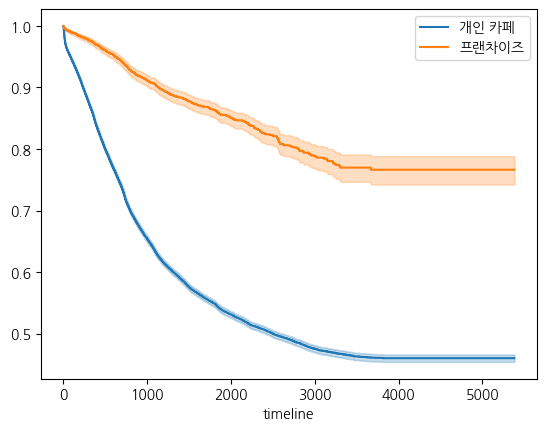

In [ ]:
# Kaplan-Meier 추정기 생성
kmf = KaplanMeierFitter()

# 개인 카페 그룹의 생존 함수 추정 및 시각화
T_personal = df_personal['총 영업일']
E_personal = df_personal['폐업여부']
kmf.fit(T_personal, E_personal, label='개인 카페')
ax = kmf.plot()

# 프랜차이즈 카페 그룹의 생존 함수 추정 및 시각화
T_franchise = df_franchise['총 영업일']
E_franchise = df_franchise['폐업여부']
kmf.fit(T_franchise, E_franchise, label='프랜차이즈')
kmf.plot(ax=ax)


In [ ]:
# Log-rank test
results = logrank_test(T_personal, T_franchise,
                       event_observed_A=E_personal,
                       event_observed_B=E_franchise)
print(results.summary)


   test_statistic              p    -log2(p)
0     1148.379472  1.009453e-251  833.790378


- 프랜차이즈 카페와 전체 카페


   test_statistic              p    -log2(p)
0     1000.609178  1.323892e-219  727.097467


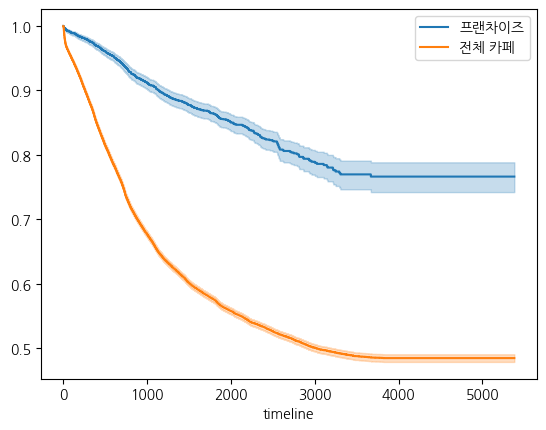

In [ ]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 프랜차이즈 카페와 전체 카페 데이터 분리
df_franchise = df3[df3['카페유형'] != '개인 카페'].copy()  # 프랜차이즈 카페
df_all = df3.copy()  # 전체 카페

# 생존 시간과 이벤트 데이터 설정
T_franchise = df_franchise['총 영업일']
E_franchise = df_franchise['폐업여부']

T_all = df_all['총 영업일']
E_all = df_all['폐업여부']

# Kaplan-Meier 추정기 생성
kmf = KaplanMeierFitter()

# 프랜차이즈 카페 그룹의 생존 함수 추정 및 시각화
kmf.fit(T_franchise, E_franchise, label='프랜차이즈')
ax = kmf.plot()

# 전체 카페 그룹의 생존 함수 추정 및 시각화
kmf.fit(T_all, E_all, label='전체 카페')
kmf.plot(ax=ax)

# Log-rank test
results = logrank_test(T_franchise, T_all,
                       event_observed_A=E_franchise,
                       event_observed_B=E_all)
print(results.summary)
